# Homework 2 (HW2)

---

By the end of this homework we expect you to be able to:

1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

## Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanatio(**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the _master/main_ branch. If there are multiple notebooks present, we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at _Piccardi Music,_ a promising new music label created by a mysterious Italian disc jockey "_Signor Piccardi_". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column             | Description                                                                                                                                                                                                                       |
| ------------------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `artist`           | The name of the artist who created the album being reviewed.                                                                                                                                                                      |
| `album`            | The name of the album being reviewed.                                                                                                                                                                                             |
| `recordlabel`      | The name of the record label(s) who published the album.                                                                                                                                                                          |
| `releaseyear`      | The year that the album was released.                                                                                                                                                                                             |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0.                                                                                                                                                           |
| `reviewauthor`     | The name of the author who reviewed the album.                                                                                                                                                                                    |
| `genre`            | The genre assigned to the album by Pitchfork.                                                                                                                                                                                     |
| `reviewdate`       | The date that the review was published.                                                                                                                                                                                           |
| `key`              | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on)                                                                                       |
| `acousticness`     | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic.                                                                                                   |
| `danceability`     | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.                                       |
| `energy`           | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy.                                                                                                    |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals.                                                                                                   |
| `liveness`         | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live.                                                                                                     |
| `loudness`         | The overall loudness of the album in decibels (dB).                                                                                                                                                                               |
| `speechiness`      | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence`          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds.                                                                                     |
| `tempo`            | The overall estimated tempo of an album in beats per minute (BPM).                                                                                                                                                                |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.


In [2]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# displaying markdown strings
from IPython.display import display, Markdown, Latex

from tqdm import tqdm

sns.set()


## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to _Signor Piccardi_ (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by _Piccardi Music_.


#### Task 1 (Initial analyses — 10 pts)

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

4. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with _found data_—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](<https://en.wikipedia.org/wiki/Pitchfork_(website)>), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected.

---


#### Task 1.1


In [3]:
# loading the data
data_folder = 'data/'
df = pd.read_csv(data_folder + 'pitchfork.csv.gz', sep=',',
                 warn_bad_lines=True, error_bad_lines=False, parse_dates=["reviewdate"])
cols = list(df.columns.values)
df.head()


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,2009-02-18,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,2003-07-17,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [4]:
df.describe(percentiles=[])


,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000
mean,7.049586,2009.335657,0.512361,0.601270,5.215824,-9.283420,0.090755,0.301888,0.274655,0.196467,0.405298,120.327545
std,1.248130,7.807743,0.158839,0.203085,1.613555,4.237493,0.090111,0.262351,0.298821,0.104898,0.182267,15.480385
min,0.000000,1957.000000,-1.000000,-1.000000,-1.000000,-51.728750,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,7.300000,2010.000000,0.511364,0.624667,5.230769,-8.445300,0.056667,0.228748,0.149386,0.174350,0.406314,120.399000
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000


Thanks to df.describe() we can see that there are some rows with invalid values in the columns related to audio features. In fact most of them have a score going from 0 to 1, but they all have -1 as minimun value. Also the key has some -1 values, even though it should go from 0 to 11. Therefore, we need to drop this invalid rows.


In [5]:
# removing invalid and duplicated rows (reviews of the same album from the same artist)
print("Rows before cleaning the data: " + str(len(df.index)))
df = df.drop_duplicates(subset=['album', 'artist'], keep='first')
print("Rows after removing duplicates (reviews of the same album from the same artist): " + str(len(df.index)))
df = df.dropna()
print("Rows after removing n/a: " + str(len(df.index)))
key_and_scores_cols = ['key', 'acousticness', 'danceability', 'energy',
                       'instrumentalness', 'liveness', 'speechiness', 'valence', 'tempo']
df = df.drop(df.loc[(df[key_and_scores_cols] < 0).any(axis=1)].index)
print("Rows after removing invalid scores for audio features: " + str(len(df.index)))


Rows before cleaning the data: 16785
Rows after removing duplicates (reviews of the same album from the same artist): 16738
Rows after removing n/a: 16738
Rows after removing invalid scores for audio features: 16730


#### Task 1.2


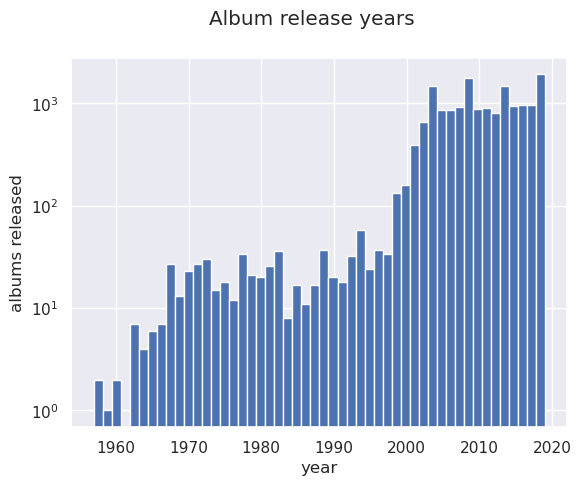

<Figure size 800x400 with 0 Axes>

In [6]:
# plotting the distribution of album release years
plt.suptitle("Album release years")
plt.hist(df['releaseyear'], bins=50)
plt.ylabel("albums released")
plt.xlabel("year")
plt.yscale('log')
fig = plt.figure(figsize=(8, 4))
plt.show()


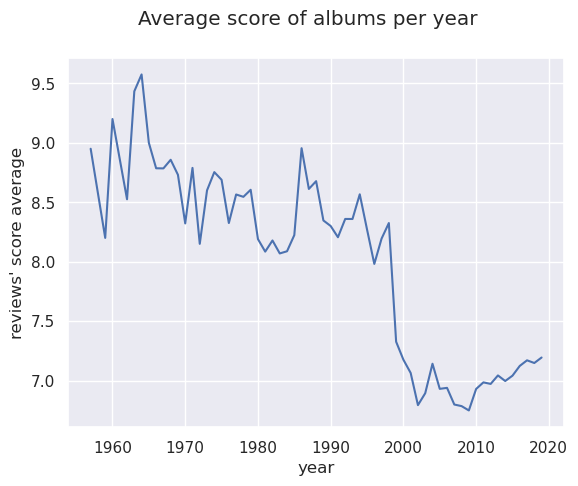

<Figure size 800x400 with 0 Axes>

In [7]:
#  plotting the average score of albums per year
plt.plot(df.groupby('releaseyear').agg('count').index,
         df.groupby('releaseyear').agg('mean')['score'])
plt.suptitle("Average score of albums per year")
plt.ylabel("reviews' score average")
plt.xlabel("year")
fig = plt.figure(figsize=(8, 4))
plt.show()


#### Task 1.3


In [8]:
# For numerical columns, calculating the mean, median, minimum value and maximum value
stats = pd.concat([df.describe().T, df.median().rename('median')],
                  axis=1).T.loc[['mean', 'median', 'max', 'min']]
stats


<ipython-input-8-7b5b51f97fdc>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stats = pd.concat([df.describe().T, df.median().rename('median')],


,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.048536,2009.345965,0.512967,0.601951,5.219034,-9.286912,0.091208,0.302476,0.275303,0.196910,0.405853,120.377216
median,7.300000,2010.000000,0.511364,0.624823,5.230769,-8.446428,0.056681,0.229000,0.149641,0.174304,0.406300,120.406490
max,10.000000,2019.000000,0.974000,0.999000,11.000000,4.078000,0.958000,0.996000,0.982000,0.978000,0.971000,215.972000
min,0.000000,1957.000000,0.038667,0.000126,0.000000,-51.728750,0.008644,0.000001,0.000000,0.015300,0.000010,23.983333


In [9]:
numerical_columns = ['score', 'releaseyear', 'danceability', 'energy', 'key', 'loudness',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
categorical_columns = ['artist', 'album', 'reviewdate',
                       'recordlabel', 'reviewauthor', 'genre']


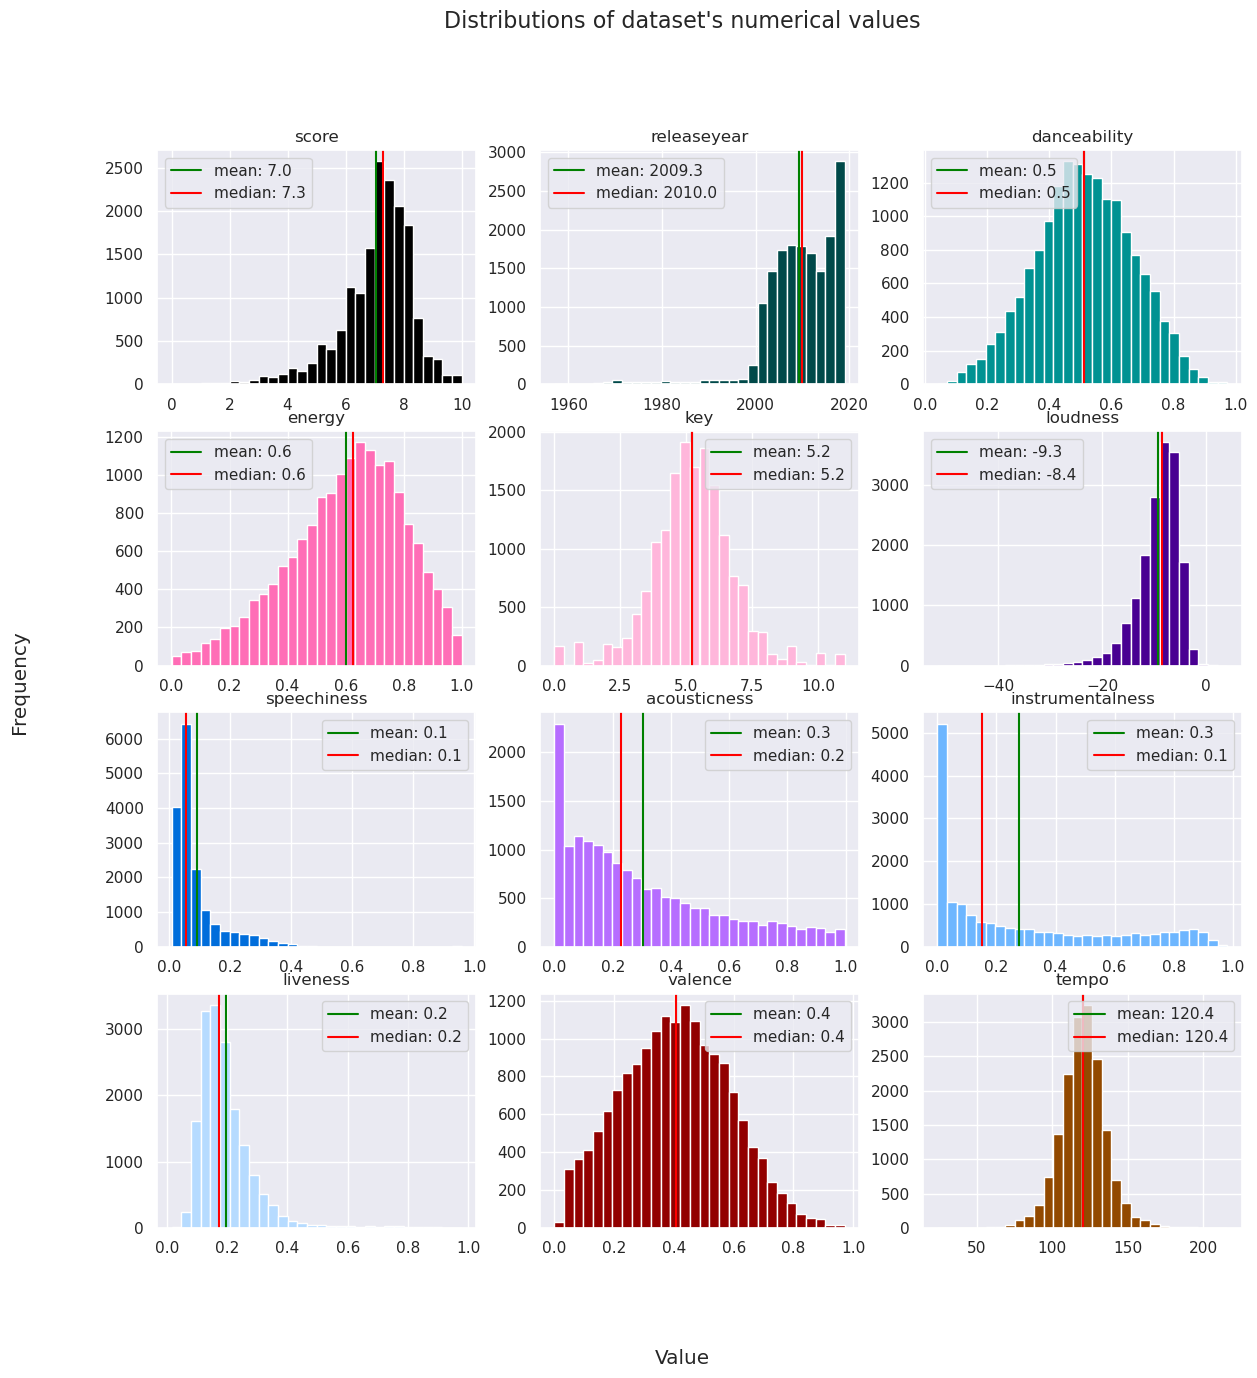

In [10]:
# plotting the distribution for  all the numerical columns in a single image

def single_image_subplots(title, df, columns, plot_cols=3, plot_std=False, plot_median=True):
    # 15 colorblind friendly colours from the web
    colours = ["#000000", "#004949", "#009292", "#ff6db6", "#ffb6db", "#490092", "#006ddb",
               "#b66dff", "#6db6ff", "#b6dbff", "#920000", "#924900", "#db6d00", "#24ff24", "#ffff6d"]

    df_numerical = df[columns]
    mean = df_numerical.mean(axis=0)
    std = df_numerical.std(axis=0)
    median = df_numerical.median(axis=0)

    fig, axs = plt.subplots(int(len(columns)/plot_cols), plot_cols)
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axs.flat):
        data = df[columns[i]].values
        ax.hist(data, color=colours[i], bins=30)

        ax.set_title(columns[i])
        ax.axvline(mean[i], color='green',
                   label=f"mean: {np.round(mean[i], 1)}")
        if(plot_std):
            ax.axvline(mean[i] - std[i], color='yellow',
                       label=f"-std: {np.round(mean[i] - std[i], 1)}")
            ax.axvline(mean[i] + std[i], color='yellow',
                       label=f"+std: {np.round(mean[i] + std[i], 1)}")
        if(plot_median):
            ax.axvline(median[i], color='red',
                       label=f"median: {np.round(median[i], 1)}")
        ax.legend()

    fig.supxlabel("Value")
    fig.supylabel("Frequency")
    fig = plt.gcf()
    fig.set_size_inches(14, 14)

    plt.show()


single_image_subplots(
    'Distributions of dataset\'s numerical values', df, numerical_columns)


#### Task 1.4


In [11]:
# assigning the value 'Other' for albums where the value is  'none'
# as seen in Task 1.1 when removing NaN, there are no rows containing NaN values.
df['genre'] = np.where(df['genre'] == 'none', "Other", df['genre'])

# for categorical columns, listing how many different values there are in each column. If there are less than 10 distinct values, printing them
for column in categorical_columns:
    unique_values = pd.unique(df[column])
    count = unique_values.shape[0]
    print(f"The {column} has different values count: {str(count)}")
    if count <= 10:
        print(f"{column}s: {unique_values}")


The artist has different values count: 7890
The album has different values count: 16176
The reviewdate has different values count: 4876
The recordlabel has different values count: 3030
The reviewauthor has different values count: 554
The genre has different values count: 10
genres: ['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'Other']


#### Task 1.5


##### Discussion. Point three (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected.

1. From Pitchfork's wikipedia's page we read that "the site's true impact on their (albums) popularity remains a source of frequent debate", meaning that if ratings actually have not a real impact on album's popularity, than the machine learning model would predict if the album will be liked by pitchfork reviewers, not if it will have any success. Assuming that Pitchfork's power to influence crowds exists, the we also read this: "The website had a reputation for publishing reviews early and for being unpredictable, often strongly dependent on which reviewer was writing. In a 2006 article in Slate, Matthew Shaer accused Pitchfork of deliberately writing provocative and contrarian reviews in order to attract attention". If this is true, then reviews' scores would be highly subjective and possibly corrupted by the website's marketing needs of attracting readers attention, leading to biased data to train the ML model with.

2. From task 1.2 we can see that score's for albums before 2000's are significantly higher than the ones for albums released after year 2000. On the other hand, we can see that the number of reviews before that year are much less. The two following sentence explain this easily: "Since 2016, it has published retrospective reviews of classics, and other albums that it had not previously reviewed, each Sunday" and " (Pitchfork) was launched in 1995". Hence reviewers picked, just one day a week (that's why they're much less than contemporary music), a classic album from the past. Being a classic, it's score can't be but above the average, it's like picking one among the best of a generation. Therefore, data for albums before year 1995 (Pitchfork creation's year) comes from another population, the one of last century's most meaningful albums.

3. On Pitchfork's Widipedia's page we can read that "In the 2000s the website's journalism favored independent music, favoring lo-fi and often obscure indie rock and giving only cursory treatment to other genres". This might mean that, at least for the part of the data from early 2000s, the albums reviewed were not from all music albums in general but more from the indie scene. From further analysis in fact, we can see how most reviewed albums are rock ones, followed by electronic and experimental, probably (except for rock) not the most listened genres. In general we can say that the amount of reviewed albums is definitely not equally distributed, therefore in this dataset there's not an equal representation of music albums in general. Last but not least, not every album contains songs of the same genre, so classifying an album with the dominant genre of the songs may be too simplistic.


In [12]:
# discussion point 3 proof
genres = pd.unique(df['genre'])
for genre in genres:
    df_slice = df.loc[df['genre'] == genre]
    print(f"""Number of {genre} albums reviewed: {len(df_slice['score'])}
Average score for {genre} albums: {np.round(df_slice['score'].mean(),3):.3f}
----""")


Number of Electronic albums reviewed: 3562
Average score for Electronic albums: 6.951
----
Number of Folk/Country albums reviewed: 734
Average score for Folk/Country albums: 7.213
----
Number of Rock albums reviewed: 6699
Average score for Rock albums: 7.002
----
Number of Rap albums reviewed: 1609
Average score for Rap albums: 6.954
----
Number of Global albums reviewed: 161
Average score for Global albums: 7.401
----
Number of Experimental albums reviewed: 1638
Average score for Experimental albums: 7.370
----
Number of Metal albums reviewed: 754
Average score for Metal albums: 7.092
----
Number of Pop/R&B albums reviewed: 1284
Average score for Pop/R&B albums: 6.982
----
Number of Jazz albums reviewed: 278
Average score for Jazz albums: 7.606
----
Number of Other albums reviewed: 11
Average score for Other albums: 7.400
----


#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0.

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---


#### Task 2.1


In [13]:
# Create a dataframe 'dummie_cols' continaining the one-hot columns
dummie_cols = pd.get_dummies(df['genre'])
for name, _ in dummie_cols.iteritems():
    dummie_cols = dummie_cols.rename(
        columns={name: (str(name).lower() + "_onehot")})
dummie_names = list(dummie_cols.columns.values)


In [14]:
# Add the one-hot columns to the original dataframe
df = pd.concat([df, dummie_cols], axis=1)


In [15]:
df.head()


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,electronic_onehot,experimental_onehot,folk/country_onehot,global_onehot,jazz_onehot,metal_onehot,other_onehot,pop/r&b_onehot,rap_onehot,rock_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,2009-02-18,Studio,Electronic,0.511917,0.499667,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.369765,0.325412,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.253943,0.912857,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,2003-07-17,Badman,Rock,0.425400,0.433474,...,0,0,0,0,0,0,0,0,0,1
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.624846,0.438154,...,0,0,0,0,0,0,0,0,1,0


#### Task 2.2


In [16]:
# Returns the selected columns cols of dataframe df as 2d numpy array
def numpy_helper(df, cols):
    return df[cols].to_numpy()


#### Task 2.3


In [17]:
# For each of the N albums, creates array x of size Nx10 of one hot columns and an array y of size Nx1
# containing the scores; return the tuple (x, y)
def divide(df, x_cols, y_col=['score']):
    return numpy_helper(df, x_cols), numpy_helper(df, y_col)


In [18]:
# Split in training and test set using train_test_split function
from sklearn.model_selection import train_test_split
x, y = divide(df, dummie_names)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=123)


#### Task 2.4


In [19]:
class BaselineRegression():
    # calculate global mean
    def fit(self, x, y):
        self.pred = np.mean(y)

    # always predict global mean
    def predict(self, x):
        return np.array([self.pred for _ in x])


In [20]:
# Building regressor on training set
lin_reg = BaselineRegression()
lin_reg.fit(x_train, y_train)

# Predicting labels for test set
predictions = lin_reg.predict(x_test)


#### Task 2.5


In [21]:
# Computing r2_score
r2 = r2_score(y_test, predictions)
print("The R^2 score is {r:.5f}".format(r=np.round(r2, 8)))


The R^2 score is -0.00001


#### Task 2.6


##### Discussion. Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

1. The error estimation is biased and most likely it would vary significantly when randomly selecting a different subset of the data as the test set. To obtain a more accurate error estimate with less variance, it would be helpful to perform cross validation. For a k-fold cross validation, we obtain k error values. We can then calculate the mean and variance of those, to obtain more meaningful error estimation.
2. Selecting only 70% of the given data for training limits the potential of the model. Once you determine which model is performing best, it would be useful to retrain the model on a higher percentage of the training data, as more training data usually leads to better performance.


#### Task 3 (Regression — 14 pts)

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear", "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns. Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set.

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---


#### Task 3.1


In [22]:
# Dividing the dataframe into X and y
x, y = divide(df, dummie_names + numerical_columns[1:])

# Splitting into train and test set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=123)

# Training the model
lin_reg = LinearRegression().fit(x_train, y_train)

# Generating predictions
predictions = lin_reg.predict(x_test)

# Calculating r2 score
r2 = r2_score(y_test, predictions)

print("The R^2 score is {r}".format(r=np.round(r2, 4)))


The R^2 score is 0.0387


#### Task 3.2


In [23]:
# Divide train and test by year
def divide_by_year(df, cols, train_year=2000, test_year=2003):
    x_tr, y_tr = divide(df[df['releaseyear'] < train_year], cols)
    x_ts, y_ts = divide(df[df['releaseyear'] >= test_year], cols)
    return x_tr, x_ts, y_tr, y_ts


In [24]:
# Splitting into train and test set
x_bf2000, x_af2003, y_bf2000, y_af2003 = divide_by_year(
    df, dummie_names + numerical_columns[1:])

# Training the model
lin_reg = LinearRegression().fit(x_bf2000, y_bf2000)

# Generating predictions
predictions = lin_reg.predict(x_af2003)

# Calculating r2 score
r2 = r2_score(y_af2003, predictions)
print("The R^2 score is {r}".format(r=np.round(r2, 4)))


The R^2 score is -0.2823


##### Discussion:

We notice that the $R^2$ score is much lower. We expected that from **Task 1** analysis, since we saw from `df['year']` distribution that the vast majority of reviewed albums was from years after 2000. In particular, we're training the model with 778 albums and testing it with 14744, resulting into a testing ratio of 96%! Furthermore, as stated before, and as shown in the plot underneath, the scores for albums before year 2000 are much higher on average, hence the training data is also different from the testing one.


Number of albums before year 2000: 778
Number of albums after year 2002: 14744


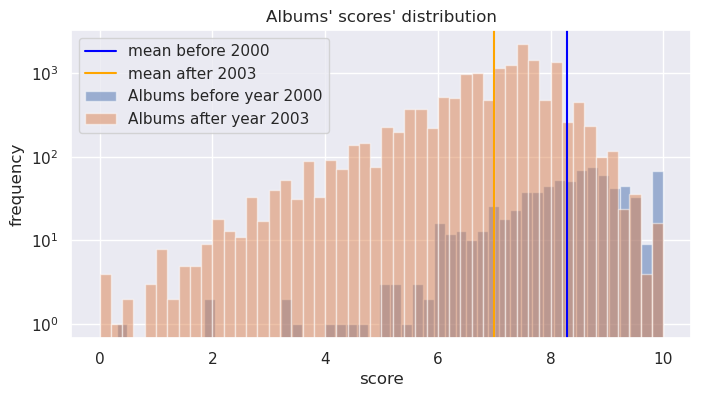

In [25]:
# proof for the discussion

before_df = df.loc[df['releaseyear'] < 2000]
after_df = df.loc[df['releaseyear'] >= 2003]
print("Number of albums before year 2000: {0}".format(len(before_df['score'])))
print("Number of albums after year 2002: {0}".format(len(after_df['score'])))

plt.hist(before_df['score'], alpha=0.5, bins=50,
         label="Albums before year 2000")
plt.hist(after_df['score'], alpha=0.5, bins=50, label="Albums after year 2003")
plt.title("Albums' scores' distribution")
plt.xlabel("score")
plt.ylabel("frequency")
plt.yscale('log')
plt.axvline(before_df['score'].mean(), color='blue', label="mean before 2000")
plt.axvline(after_df['score'].mean(), color='orange', label="mean after 2003")
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.legend()


plt.show()


#### Task 3.3


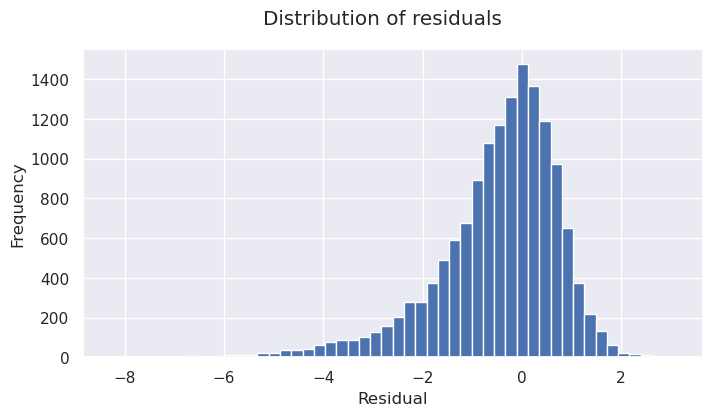

In [26]:
# Calculate residuals
residuals = np.array(y_af2003 - predictions)

# Plotting the distribution of the residuals
plt.figure(figsize=(8, 4))
plt.suptitle("Distribution of residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.hist(residuals, bins=50)
plt.show()


In [27]:
# Calculate probability that the absolute value of the residual is greater than two
def prob_greater_than(array, k=2):
    return (array[array > k].size+array[array < -k].size)/array.size


100%|██████████| 14744/14744 [00:02<00:00, 5783.43it/s]


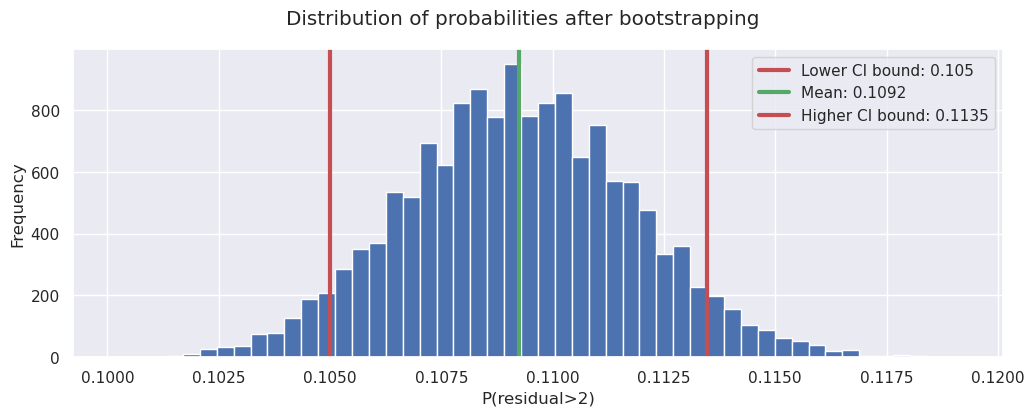

In [28]:
# Bootstrapping
probabilities = []
for i in tqdm(range(residuals.shape[0])):
    sample = np.random.choice(
        residuals.squeeze(), size=residuals.size, replace=True)
    stat = prob_greater_than(sample)
    probabilities.append(stat)
probabilities = np.array(probabilities)

plt.figure(figsize=(12, 4))
plt.suptitle("Distribution of probabilities after bootstrapping")
plt.ylabel("Frequency")
plt.xlabel("P(residual>2)")
plt.hist(probabilities, bins=50)
lower = np.percentile(probabilities, 5)
higher = np.percentile(probabilities, 95)
plt.axvline(lower, color='r', linewidth=3,
            label='Lower CI bound: {l}'.format(l=np.round(lower, 4)))
plt.axvline(probabilities.mean(), color='g', linewidth=3,
            label='Mean: {m}'.format(m=np.round(probabilities.mean(), 4)))
plt.axvline(higher, color='r', linewidth=3,
            label='Higher CI bound: {h}'.format(h=np.round(higher, 4)))
plt.legend()
plt.show()


The probability that the score prediction is off by more than 2-points is around 10.9%, and we can state with 90% confidence that it lies between 10.5% and 11.3%.


#### Task 3.4


In [29]:
# Splitting into train and test set
x_bf2000, x_af2003, y_bf2000, y_af2003 = divide_by_year(
    df, dummie_names + numerical_columns[1:])

# Training the model
boost_reg = GradientBoostingRegressor().fit(x_bf2000, y_bf2000.squeeze())

# Generating predictions
predictions = boost_reg.predict(x_af2003)

# Calculating r2 score
r2 = r2_score(y_af2003, predictions)

print("The R^2 score is {r}".format(r=np.round(r2, 4)))


The R^2 score is -0.4252


#### Task 3.5


##### Discussion : Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

The Gradient Boosting Regressor is usually more accurate than simple Linear Regression for this kinds of predictions. Since the data it's been trained with is completely different from the data it's been tested with (the average score is significantly higher in train data), the resulting R2 score is bad in both cases.Gradient Boosting Regressor has a worse R2 score because it is much more sensitive to outliers due to the way trees are built, creating a more complex model which is less robust to such an high difference between test and train data. We should also consider that Gradient Boosting Regressor needs hyperparameters' tuning which has not been done in this case, whereas Linear Regressor doesn't require it.


#### Task 4 (Are we solving the correct problem? — 16 pts)

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set.

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean $R^2$ along with the 90% CI for each scenario.
   - n_estimators $ \in \{ 100, 200, 300, 400\}$
   - learning_rate $ \in \{ 0.1, 0.05, 0.01\}$.

With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.

4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---


#### Task 4.1


In [61]:
# creating new dataframe for artists with more than 1 album reviewed
new_df = pd.DataFrame(columns=df.columns)
# adding "_previous" columns to the new dataframe
cols = dummie_names + numerical_columns
for i, _ in enumerate(cols):
    new_df[cols[i] + "_previous"] = 0
# looping over all artists (each considered only once)
artists = pd.unique(df['artist'])
for artist in artists:
    # dataframe's slice of artist's reviewes only
    artist_slice = df[df['artist'] == artist]
    # considering only artists with more than 1 album reviewed
    if artist_slice.shape[0] > 1:
        latest_release_year = df[df['artist'] == artist]['releaseyear'].max()
        # if there are more albums released in the same year, we get the first row
        latest_release = df[(df["artist"] == artist) & (
            df["releaseyear"] == latest_release_year)].head(1).index
        # adding latest album reviewed to the new dataframe
        new_df = pd.concat([artist_slice.loc[latest_release], new_df])
        artist_slice.drop(latest_release)
        # calculating mean of previous albums' scores and storing them in newly created "_previous" columns
        for col in cols:
            new_df.at[latest_release, [col + "_previous"]
                      ] = artist_slice[col].mean()


In [62]:
print("Column names:")
print(new_df.columns)
print("\nNumber of rows: " + str(new_df.shape[0]))


Column names:
Index(['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'electronic_onehot', 'experimental_onehot',
       'folk/country_onehot', 'global_onehot', 'jazz_onehot', 'metal_onehot',
       'other_onehot', 'pop/r&b_onehot', 'rap_onehot', 'rock_onehot',
       'electronic_onehot_previous', 'experimental_onehot_previous',
       'folk/country_onehot_previous', 'global_onehot_previous',
       'jazz_onehot_previous', 'metal_onehot_previous',
       'other_onehot_previous', 'pop/r&b_onehot_previous',
       'rap_onehot_previous', 'rock_onehot_previous', 'score_previous',
       'releaseyear_previous', 'danceability_previous', 'energy_previous',
       'key_previous', 'loudness_previous', 'speechiness_previous',
       'acousticness_previous', 'instrumentalness_previous',
       'liveness

#### Task 4.2


In [63]:
# Using Gradient Boosting Regressor with random split of new dataset data
cols = dummie_names + numerical_columns

previous_cols = []
for i, _ in enumerate(cols):
    previous_cols.append(cols[i] + "_previous")

# Dividing the dataframe into X and y
#x, y = divide(last_df, dummie_names + numerical_columns[1:] + previous_cols)
x, y = divide(new_df, dummie_names + numerical_columns[1:] + previous_cols)

# Splitting into train and test set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=123)

# Training the model with boosting regressor
boost_reg = GradientBoostingRegressor().fit(x_train, np.ravel(y_train))

# Generating predictions
predictions = boost_reg.predict(x_test)

# Calculating r2 score
r2 = r2_score(y_test, predictions)
print("The R2 score is {r}".format(r=np.round(r2, 4)))


The R2 score is 0.6237


#### Task 4.3


In [64]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)

    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)


def cross_validation(y, x, k_indices, k, learning_rate, n_estimator):
    # get k'th subgroup in test, others in train
    x_train = np.delete(x, k_indices[k], 0)
    y_train = np.delete(y, k_indices[k], 0)
    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    boost_reg = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=n_estimator).fit(x_train, np.ravel(y_train))
    predictions = boost_reg.predict(x_test)
    r2 = r2_score(y_test, predictions)
    return r2


# used to calculate 90% confidence interval values
z_star = 1.645


def tune_hyperparameter(y, x, seed=123, k_fold=20, learning_rates=None, n_estimators=None, verbose=False):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    best_learning_rate = 0
    best_n_estimator = 0
    best_r2 = 0.0
    best_ci = (0.0, 0.0)
    iter = 1
    for learning_rate in learning_rates:
        for n_estimator in n_estimators:
            r2s = []
            for i in tqdm(range(k_fold)):
                r2 = cross_validation(y, x, k_indices, i,
                                      learning_rate, n_estimator)
                r2s.append(r2)

            lower_CI = np.percentile(r2s, 5)
            higher_CI = np.percentile(r2s, 95)
            r2 = np.mean(r2s)

            if r2 > best_r2:
                best_r2 = r2
                best_ci = (lower_CI, higher_CI)
                best_learning_rate = learning_rate
                best_n_estimator = n_estimator
            if verbose:
                print(f"{iter:2d} | " + f"Learning rate: {learning_rate} " +
                      f"N_estimators: {n_estimator} " + f"R2: {r2} " + f"90% CI: [{lower_CI}, {higher_CI}]")
            iter += 1
    print(f"Best hyperparameters | Learning rate: {best_learning_rate} " +
          f"N_estimators: {best_n_estimator} " + f"R2: {best_r2} " + f"90% CI: [{best_ci[0]}, {best_ci[1]}]")

    return best_learning_rate, best_n_estimator


In [33]:
do_tuning = True

if do_tuning:
    best_learning_rate, best_n_estimator = tune_hyperparameter(
        y, x, learning_rates=[0.1, 0.05, 0.01], n_estimators=[100, 200, 300, 400], verbose=True)
else:
    # saving best parameters in order to not run tuning everytime
    best_learning_rate = 0.05
    best_n_estimator = 100


100%|██████████| 20/20 [00:39<00:00,  1.95s/it]


 1 | Learning rate: 0.1 N_estimators: 100 R2: 0.5969351677205477 90% CI: [0.4780800255597233, 0.7282136333361636]


100%|██████████| 20/20 [01:14<00:00,  3.72s/it]


 2 | Learning rate: 0.1 N_estimators: 200 R2: 0.5896988293415475 90% CI: [0.45604690953002536, 0.7155684608852428]


100%|██████████| 20/20 [01:44<00:00,  5.24s/it]


 3 | Learning rate: 0.1 N_estimators: 300 R2: 0.5807874036021511 90% CI: [0.4420481653932243, 0.6967852188654765]


100%|██████████| 20/20 [02:16<00:00,  6.84s/it]


 4 | Learning rate: 0.1 N_estimators: 400 R2: 0.5740240883447961 90% CI: [0.43093974879381874, 0.6903272580613777]


100%|██████████| 20/20 [00:34<00:00,  1.72s/it]


 5 | Learning rate: 0.05 N_estimators: 100 R2: 0.5972547379458746 90% CI: [0.4714576392393188, 0.7205440813677496]


100%|██████████| 20/20 [01:11<00:00,  3.60s/it]


 6 | Learning rate: 0.05 N_estimators: 200 R2: 0.5970220354369836 90% CI: [0.47607771651412983, 0.7255699611178053]


100%|██████████| 20/20 [01:49<00:00,  5.45s/it]


 7 | Learning rate: 0.05 N_estimators: 300 R2: 0.5931913448335061 90% CI: [0.4734958158828279, 0.7210184189345662]


100%|██████████| 20/20 [02:21<00:00,  7.09s/it]


 8 | Learning rate: 0.05 N_estimators: 400 R2: 0.5901245892249718 90% CI: [0.4622096501272185, 0.7190037263128057]


100%|██████████| 20/20 [00:34<00:00,  1.74s/it]


 9 | Learning rate: 0.01 N_estimators: 100 R2: 0.49991238211861866 90% CI: [0.427261411431311, 0.5894082209282482]


100%|██████████| 20/20 [01:08<00:00,  3.45s/it]


10 | Learning rate: 0.01 N_estimators: 200 R2: 0.577389439229389 90% CI: [0.4768018849642508, 0.692060287259281]


100%|██████████| 20/20 [01:44<00:00,  5.25s/it]


11 | Learning rate: 0.01 N_estimators: 300 R2: 0.5916706880935121 90% CI: [0.48029552556183486, 0.7132563465826525]


100%|██████████| 20/20 [02:20<00:00,  7.02s/it]

12 | Learning rate: 0.01 N_estimators: 400 R2: 0.5959387615319544 90% CI: [0.48179007765810794, 0.716950617442743]
Best hyperparameters | Learning rate: 0.05 N_estimators: 100 R2: 0.5972547379458746 90% CI: [0.4714576392393188, 0.7205440813677496]


In [65]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=123)

boost_reg = GradientBoostingRegressor(
    learning_rate=best_learning_rate, n_estimators=best_n_estimator).fit(x_train, np.ravel(y_train))

predictions = boost_reg.predict(x_test)

r2 = r2_score(y_test, predictions)

print("The R2 score is {r}".format(r=np.round(r2, 4)))


The R2 score is 0.6314


#### Task 4.4

##### Discuss: How do these results compare with the previous setup (the scenario considered in Task 3.4)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

In **Task 3.4** we try to predict the values based on information about the album, in **Task 4.3** we expand this by adding features with information about the past releases of an artist. It is hard to compare the results, because there are signficiant differences in the experiment setup:

1. Due to the longitudinal train/test split, the model in **3.4** is trained on a very small sample of data (less than 5%). **4.3** follows a random train/test split.
2. We only consider a subset of the dataset:
   - We disregard the artists that have released only one album.
   - We only predict the scores for the last release of each artist - we do not know how model from **4.3** would perform on the earlier albums.
3. Additionally, in **4.3** we perform hyperparameter tuning, while in **3.4** we do not.

Because the two models are trained and tested using different datasets with different features and it is not meaningful to directly compare the obtained $R^2$ scores.

<hr style="height:1em;">

To get a fair comparison of the scores, we could:

1. Perform the same kind of train/test split for both classifiers.
2. For the **4.3** classifier, instead of only keeping the last album of each artist, we could keep all the albums and for each album build the `_previous` features by considering all the albums released prior to that album. If there are no previous albums available (when considering an artist's first or only album) you could use the global mean to fill in the `_previous` columns.
3. For the **3.4** classifier, we should also perform hyperparameter tuning and subsequent training on the entire dataset.


## Part 2: Second Album Syndrome

Your second project at _Piccardi Music_ is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).


#### Task 5 (Preliminary analyses — 8 pts)

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions.
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---


#### Task 5.1


In [30]:
# Filter those who have at least two albums
album_count = df.groupby(["artist"], as_index=False).agg({"album": "count"})
two_albums = album_count[album_count["album"] >= 2]

# Create the new dataframe with data for artists with at least two albums
newDf = df[df["artist"].isin(list(two_albums["artist"]))].copy()


#### Task 5.2


In [31]:
# Order by artist and release year
newDf = newDf.sort_values(['artist', 'releaseyear']).reset_index()
newDf['previous_albums'] = 0

# Iterate over rows, when encounter an new album
for index, row in tqdm(newDf.iterrows()):
    if index > 0 and newDf.loc[index, 'artist'] == newDf.loc[index-1, 'artist']:
        newDf.loc[index, 'previous_albums'] = newDf.loc[index -
                                                        1, 'previous_albums'] + 1

newDf.head()


12401it [00:04, 2517.23it/s]


,index,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,...,experimental_onehot,folk/country_onehot,global_onehot,jazz_onehot,metal_onehot,other_onehot,pop/r&b_onehot,rap_onehot,rock_onehot,previous_albums
0,7411,!!!,Split EP,Dominique Leone,6.0,1999.0,2004-02-12,GSL,Rock,0.470000,...,0,0,0,0,0,0,0,0,1,0
1,6891,!!!,Louden Up Now,Nick Sylvester,7.0,2004.0,2004-06-07,Touch and Go,Rock,0.808273,...,0,0,0,0,0,0,0,0,1,1
2,10517,!!!,Myth Takes,Brian Howe,8.0,2007.0,2007-03-02,Warp,Rock,0.646500,...,0,0,0,0,0,0,0,0,1,2
3,10053,!!!,"Strange Weather, Isn't It?",Larry Fitzmaurice,6.9,2010.0,2010-08-20,Warp,Rock,0.711889,...,0,0,0,0,0,0,0,0,1,3
4,2397,!!!,Thr!!!er,Brian Howe,6.0,2013.0,2013-04-30,Warp,Rock,0.778222,...,0,0,0,0,0,0,0,0,1,4


#### Task 5.3


In [32]:
# Separating first and second albums
first_albums = newDf[newDf['previous_albums'] == 0].reset_index(drop=True)

second_albums = newDf[newDf['previous_albums'] == 1].reset_index(drop=True)


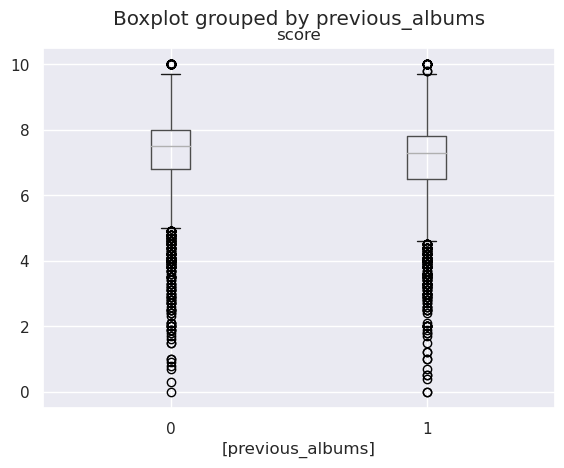

First albums: mean = 7.299, standard error = 0.021
Second albums: mean = 7.044, standard error = 0.021


In [33]:
# Calculating mean and standard error of the mean
mean_first = first_albums['score'].mean()
sem_first = first_albums['score'].sem()

mean_second = second_albums['score'].mean()
sem_second = second_albums['score'].sem()

newDf[newDf['previous_albums'] <= 1][[
    'score', 'previous_albums']].boxplot(by='previous_albums')
plt.show()

print("First albums: mean = {m1}, standard error = {s1}\nSecond albums: mean = {m2}, standard error = {s2}".format(
    m1=np.round(mean_first, 3), s1=np.round(sem_first, 3), m2=np.round(mean_second, 3), s2=np.round(sem_second, 3)))


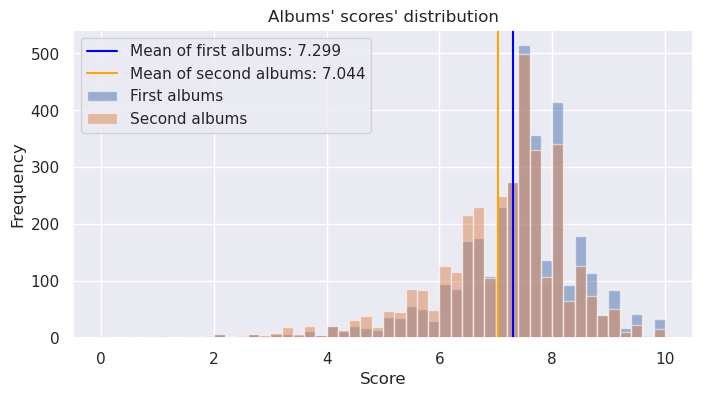

In [34]:
plt.hist(first_albums['score'], alpha=0.5, bins=50, label="First albums")
plt.hist(second_albums['score'], alpha=0.5, bins=50, label="Second albums")
plt.title("Albums' scores' distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
first_mean = first_albums['score'].mean()
second_mean = second_albums['score'].mean()
plt.axvline(first_mean, color='blue',
            label=f"Mean of first albums: {round(first_mean,3)}")
plt.axvline(second_mean, color='orange',
            label=f"Mean of second albums: {round(second_mean,3)}")
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.legend()
plt.show()


#### Task 5.4


In [35]:
ttest_ind(first_albums['score'], second_albums['score'])


Ttest_indResult(statistic=8.586050506849507, pvalue=1.0935046456865573e-17)

p-value is much less than 0.05 -> we can reject the null hypothesis that the scores of first and second albums have the same expected value -> there is a statistically significant difference


#### Task 5.5

##### Discuss: Do these analyses suggest that the "second album syndrome" exists?

Yes, based on the conducted analyses, we can osberve a statistically significant difference between the ratings for the first album of an artist and their second album. However, the difference is not very large - a mean of 7.3 for first albums vs. a mean of 7.04 for second albums.


#### Task 6 (Regression analysis — 20 pts)

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:** the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
   - `score_diff`: the difference in scores between the second and the first album (second - first).
   - `time_diff`: the number of days elapsed between the first and the second album.
   - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model.
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version
   `time_diff`?

---

**¹** Music related numerical features are: "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


#### Task 6.1


In [36]:
# Create new dataframe for first and second albums values difference
fsDf = first_albums[['artist']].copy()

# Difference in the scores
fsDf['score_diff'] = second_albums['score'].astype(
    float) - first_albums['score'].astype(float)

# Difference in release year
fsDf['time_diff'] = (second_albums['releaseyear'].astype(
    int) - first_albums['releaseyear'].astype(int)) * 365
# for albums released in the same year, assume 180 days difference
# fsDf['time_diff'] = fsDf['time_diff'].replace(0, 180)


In [37]:
# Calculate standardized euclidean distances for each pair
musical_features = ["key", "acousticness", "danceability", "energy",
                    "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo"]

first_musical_features = first_albums[musical_features]
second_musical_features = second_albums[musical_features]

variances = np.array(
    pd.concat([first_musical_features, second_musical_features]).var(axis=0))

distances = []
for (_, row1), (_, row2) in zip(first_musical_features.iterrows(), second_musical_features.iterrows()):
    distances.append(seuclidean(row1, row2, variances))
distances = np.array(distances)


In [38]:
# Add variable that indicates whether the style of the music has changed
threshold = np.percentile(distances, 80)
fsDf['did_style_change'] = (distances > threshold).astype(int)


#### Task 6.2


In [39]:
# declare the Linear Regression model with just an intercept
mod = smf.ols(formula='score_diff ~ 1', data=fsDf)

# fit the model, with reproducable seed
np.random.seed(123)
res = mod.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        22:06:58   Log-Likelihood:                -6205.5
No. Observations:                3561   AIC:                         1.241e+04
Df Residuals:                    3560   BIC:                         1.242e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2553      0.023    -11.021      0.000      -0.301      -0.210
==============================================================================
Omnibus:                      360.305   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2225.432
Skew:                          -0.264   Prob(JB):                         0.00
Kurtosis:                       6.837   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Task 6.3

##### Discuss: Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?

The R^2 value of 0 is to be expected as currently the model is just a contant intercept and does no attempt to estimate the real model using any predictors. The fact that the intercept is negative and significant (P>|t| = 0) confirms what observed in task 5: the score decreases album after album when there's no other variable in action, such as a change in the style of the songs or a change in the time spent creating them.


#### Task 6.4


In [40]:
# use time_diff and did_style_change as predictors
mod = smf.ols(
    formula='score_diff ~ time_diff + C(did_style_change)', data=fsDf)

res = mod.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.15
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.44e-15
Time:                        22:06:58   Log-Likelihood:                -6172.6
No. Observations:                3561   AIC:                         1.235e+04
Df Residuals:                    3558   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.1309      0.029     -4.438      0.000      -0.189      -0.073
C(did_style_change)[T.1]    -0.0209      0.057     -0.364      0.716      -0.134       0.092
time_diff                -9.155e-05   1.13e-05     -8.124      0.000      -0.000   -6.95e-05
==============================================================================
Omnibus:                      333.224   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2052.933
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                       6.698   Cond. No.                     6.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Task 6.5

##### Discuss : Interpret the coefficients _time_diff_ and _did_style_change_. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?

The coefficient value of -0.02 suggests a negative correlation with this predictor, i.e. the value `did_style_change == 1` might predict a lower `score_diff` (likely negative) vs the value `did_style_change == 0`. On the other hand, the p-value for `did_style_change` is much greater than 0.05 , hence we can not safely reject the null hypothesis that it is uncorrelated to the value of `score_diff`. Therefore, it might suggest that the **_style change hypothesis_** is true, but there's no statistical significance to provide an evidence towards it.

The p-value for `time_diff` is 0 thus we can rule out the null hypothesis that it is uncorrelated to `score-diff`.  
The coefficient value for it is also ~0, hence it seems to suggest that there's no change in score when `time_diff` changes. Thus it provides evidence against the **_time spent hypothesis_** ( an album made in a rush doesn't affect the review's score).

These results **do not** rule out other reasons for the _second album syndrome_ effect.


#### Task 6.6


In [41]:
# standardize the values for the time_diff column
fsDf['time_diff_standardized'] = (
    fsDf['time_diff'] - fsDf['time_diff'].mean()) / fsDf['time_diff'].std()


In [42]:
# use time_diff_standardized and did_style_change as predictors
mod = smf.ols(
    formula='score_diff ~ time_diff_standardized + C(did_style_change)', data=fsDf)

res = mod.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.15
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.44e-15
Time:                        22:06:58   Log-Likelihood:                -6172.6
No. Observations:                3561   AIC:                         1.235e+04
Df Residuals:                    3558   BIC:                         1.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.2511      0.026     -9.783      0.000      -0.301      -0.201
C(did_style_change)[T.1]    -0.0209      0.057     -0.364      0.716      -0.134       0.092
time_diff_standardized      -0.1866      0.023     -8.124      0.000      -0.232      -0.142
==============================================================================
Omnibus:                      333.224   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2052.933
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                       6.698   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Task 6.7

##### Discuss : Explain how the interpretation of the coefficients associated with this new column _time_diff_standardized_ differ from its non-standardized version _time_diff_?

The coefficient value has changed to -0.19, suggesting a negative correlation with the output. i.e. increase in time spent on the second album might be correlated to lower values for `score_diff`. This suggests evidence against the **time spent hypothesis**. This rules out another reason for the _second album syndrome_ effect: artists may try to spend more time in their second albums and this results into a lower score.


#### Task 7 (Sanity checks — 6 pts)

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2.  Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3.  **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


#### Task 7.1

##### Discuss: If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?

If the second album had a special reason to be afflicted, we would expect the mean score of the third album to be on average the same as the score of the first album.


#### Task 7.2


In [43]:
# keep only the scores, and prev_album count for each album
newDf = newDf[['score', 'previous_albums']]

# add scores for all the i(th) albums to column album_i
scoresDf = pd.DataFrame()
for i in range(4):
    scoresDf[f'album_{i}'] = newDf[newDf['previous_albums']
                                   == i]['score'].reset_index(drop=True)

scoresDf.head()


,album_0,album_1,album_2,album_3
0,6.0,7.0,8.0,6.9
1,8.4,8.6,10.0,6.7
2,8.7,8.6,7.6,7.5
3,8.0,8.0,7.2,7.7
4,8.1,6.0,6.5,7.8


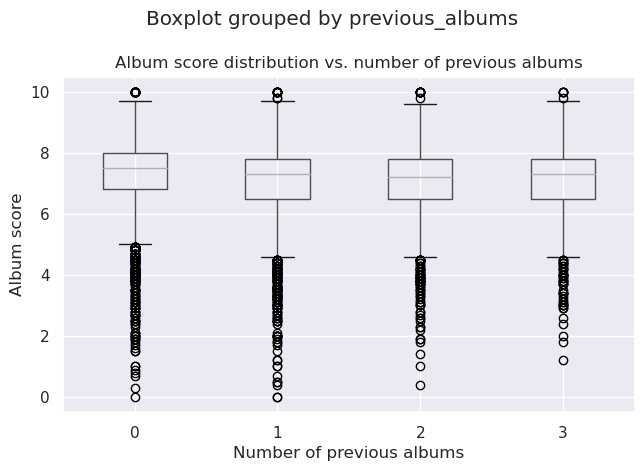

In [44]:
newDf[newDf['previous_albums'] < 4].boxplot(by='previous_albums')
plt.tight_layout()
plt.xticks()
plt.title("Album score distribution vs. number of previous albums")
plt.ylabel("Album score")
plt.xlabel("Number of previous albums")
plt.show()


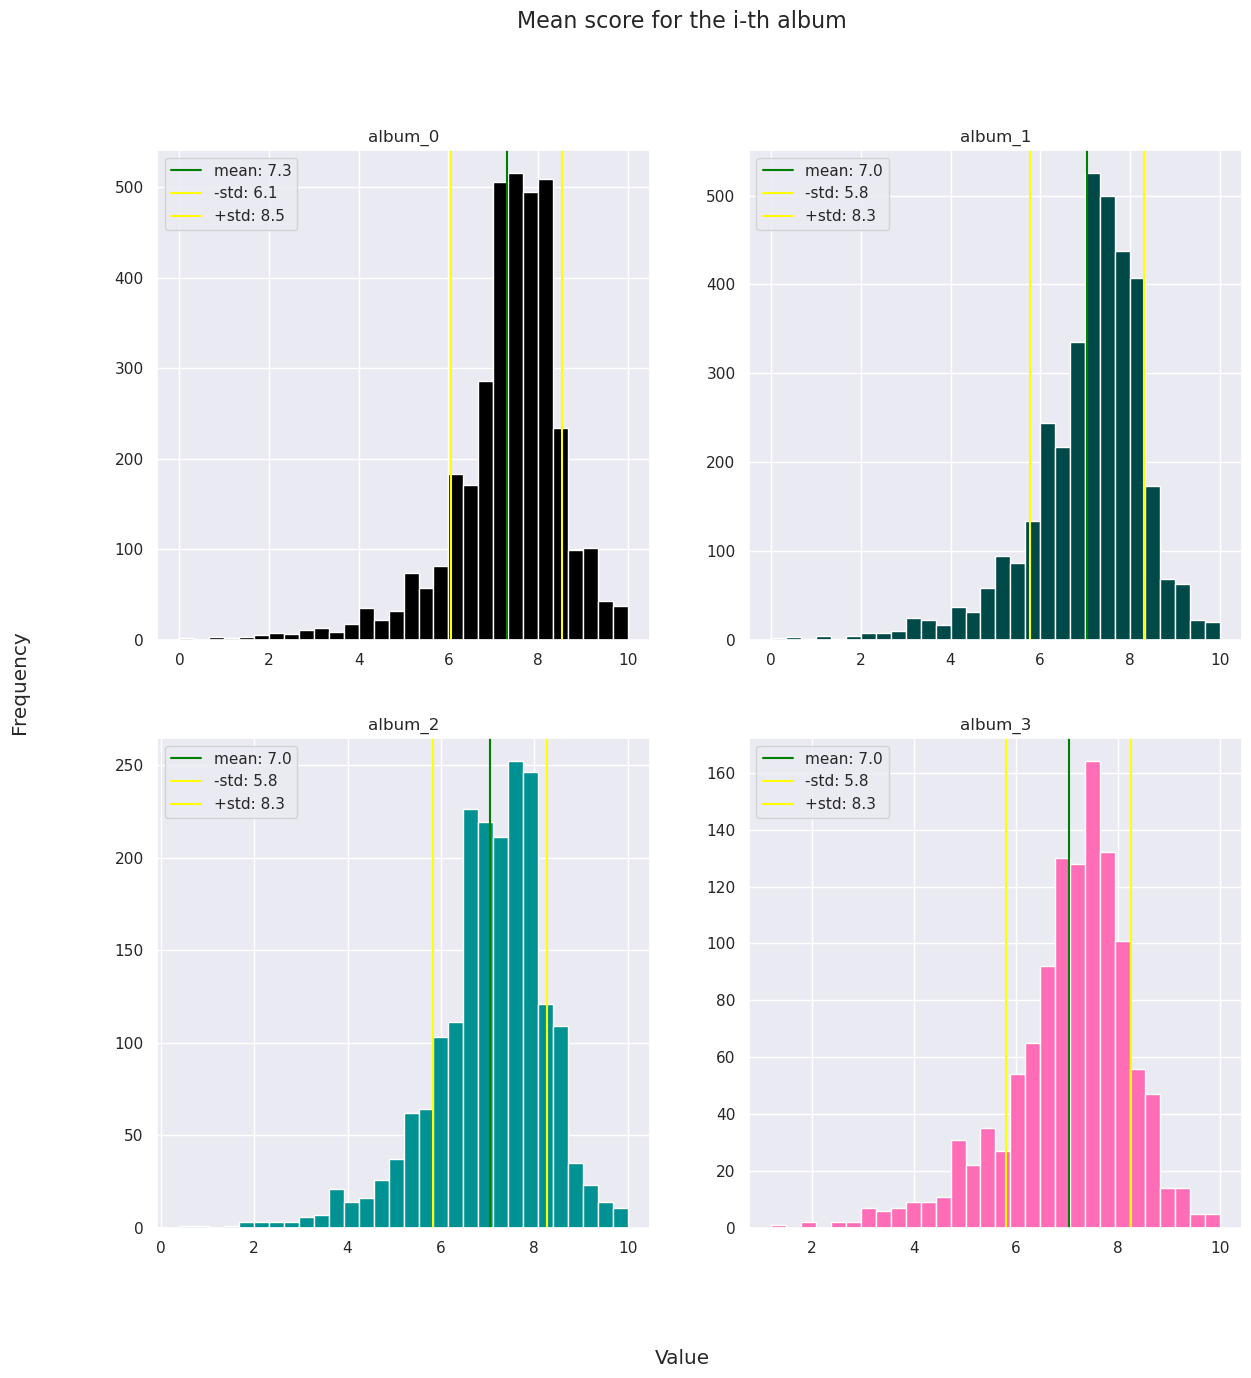

Test statistical difference between avg score for 2nd and 3rd albums: Ttest_indResult(statistic=-0.02059438136638949, pvalue=0.9835699684996251)


In [45]:
single_image_subplots("Mean score for the i-th album", scoresDf,
                      [f'album_{i}' for i in range(4)], plot_cols=2, plot_std=True, plot_median=False)

test = ttest_ind(scoresDf['album_1'].dropna(), scoresDf['album_2'].dropna())
print(
    f"Test statistical difference between avg score for 2nd and 3rd albums: {test}")


The p-value is much greater than 0.05 -> we cannot reject the null hypothesis that the scores of second and third albums have the same expected value -> there is no statistically significant difference between mean score of 2nd and 3rd albums


#### Task 7.3

##### Discuss: Does this suggest that the Second Album Syndrome exists?

As said in Task **7.1** if a special _Second Album_ Syndrome existed, we would expect the avg scores of the third albums to bounce back to the avg scores of first albums. However, as can be seen in the plots above, the expected scores of the third and following albums remain low and the test above confirms the difference in the means to be statistically insignificant.

This suggests that there might exist a _First Album Syndrome_ wherein the first album of an artist is always rated highest.


#### Task 8 (Eureka — 14 pts)

Your boss, _Signor Piccardi_, proposes that you carry out a simulation to make things clearer. Assuming that:

- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.

Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the scores obtained in Task 7.2.

---

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))


In [46]:
n_bands = 1000

talents = np.random.uniform(2, 8, n_bands)
albums = np.array([np.random.normal(talent, 1) for talent in talents])


In [47]:
# construct a dataframe from the generated talents and albums
def make_dataframe(talents, albums):
    data = np.stack((talents, albums)).T
    frame = pd.DataFrame(data=data, columns=["talent", "album"])
    return frame


frame = make_dataframe(talents, albums)
frame.head()


,talent,album
0,6.178815,6.168782
1,3.716836,2.871192
2,3.361109,4.272569
3,5.307889,3.933392
4,6.316814,5.769748


In [48]:
# plot the distribution of ratings before and after filtering

def plot_compare_dist(data1, data2, plot_specs):
    bins = np.arange(0, 10, 0.5)
    plt.hist(data1, label=plot_specs["label1"], bins=bins, alpha=0.6,
             color='#009292', weights=np.ones(len(data1)) / len(data1))
    plt.hist(data2, label=plot_specs["label2"], bins=bins, alpha=0.5,
             color='#ff6db6', weights=np.ones(len(data2)) / len(data2))
    mean1 = data1.mean()
    mean2 = data2.mean()
    plt.axvline(
        mean1, label=f"mean {plot_specs['label1']}: {round(mean1, 3)}", color='navy')
    plt.axvline(
        mean2, label=f"mean {plot_specs['label2']}: {round(mean2, 3)}", color='red')
    plt.xlabel(plot_specs["xlabel"])
    plt.ylabel(plot_specs["ylabel"])
    plt.title(plot_specs["title"])
    plt.legend()
    plt.show()


In [49]:
# filter the artists with album score lower than 6
filtered_frame = frame[frame["album"] >= 6]


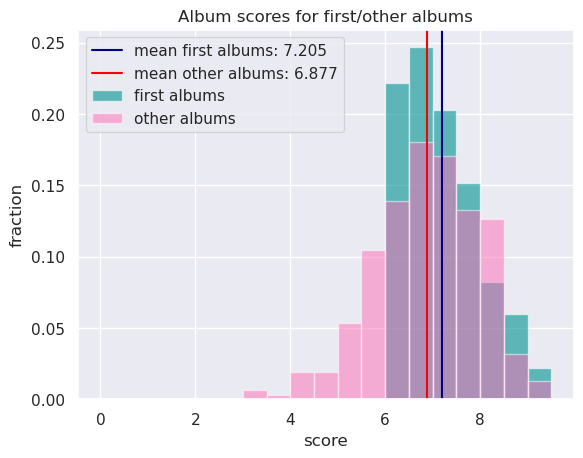

Test statistical difference between avg score for first vs second album: Ttest_indResult(statistic=3.5374164554622465, pvalue=0.0004337595239214443)
Test statistical difference between avg score for second vs third album: Ttest_indResult(statistic=0.33973035411396413, pvalue=0.7341728286797804)


In [50]:
# generate more albums for the filtered artists
new_frame = filtered_frame[["talent"]]
new_frame["album_1"] = new_frame["talent"].apply(
    lambda talent: np.random.normal(talent, 1))
new_frame["album_2"] = new_frame["talent"].apply(
    lambda talent: np.random.normal(talent, 1))

plot_compare_dist(filtered_frame["album"], (new_frame["album_1"] + new_frame["album_2"]) / 2, {
                  "label1": "first albums", "label2": "other albums", "xlabel": "score", "ylabel": "fraction", "title": "Album scores for first/other albums"})

test = ttest_ind(filtered_frame['album'], new_frame['album_1'])
print(
    f"Test statistical difference between avg score for first vs second album: {test}")

test = ttest_ind(new_frame['album_1'], new_frame['album_2'])
print(
    f"Test statistical difference between avg score for second vs third album: {test}")


There is a statistically significant difference between average score for first vs second album.  
But there is **no** statistically significant difference between average score for second vs third album.


#### Task 8 - discussion

##### Analyzing the scores obtained in this simulation, provide a coherent explanation for the scores obtained in Task 7.2.

Rather than the "Second Album Syndrome", we observe more of a "First Album Syndrome": the first album gets a rating higher than the following ones.

The filtering procedure performed in **Task 8** results in a biased selection of artists: we retain artists who have a lower talent but overperformed on their first album and drop artists with a higher talent who underperformed on their first album.  
This can be clearly observed in the output below:

- before filtering, the mean talent and mean score are almost identical which is expected as the scores are normally distributed around the talents
- after filtering, the mean talent and mean score for the album diverge - the mean score becomes much higher, proving that we select a sample biased towards the artists whose first album overperforms their talent

The same is likely true for real artists - the group of the artists who release multiple albums is not representative of all artists, but it is biased towards artists with a "good" first album who get more motivation/opportunities to create/release follow-up albums. Naturally, some of those artists outperformed their "talent" on the first album and it is difficult for them to repeat that success.


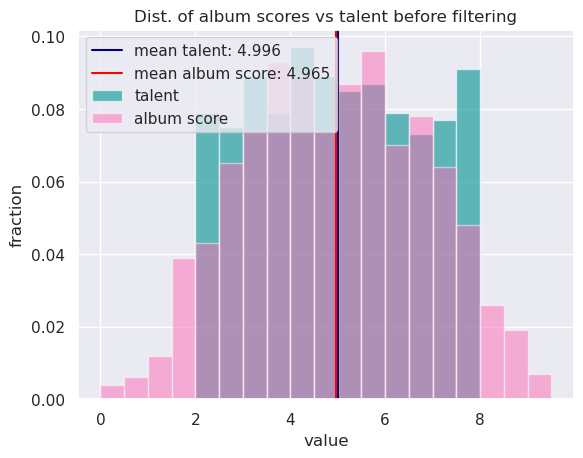

Before filtering: mean talent:  5.00, mean score:  4.96, ttest: Ttest_indResult(statistic=0.38411747838797083, pvalue=0.7009322516614362)


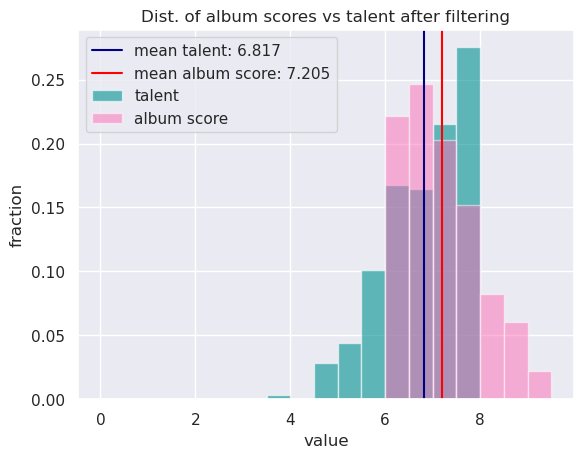

After filtering:  mean talent:  6.82, mean score:  7.20, ttest: Ttest_indResult(statistic=-5.754852571640487, pvalue=1.3543931781208344e-08)


In [51]:
# Calculation 8.1: comparison of talent vs score before and after filtering
plot_compare_dist(frame['talent'], frame['album'], {"label1": "talent", "label2": "album score",
                                                    "xlabel": "value", "ylabel": "fraction", "title": "Dist. of album scores vs talent before filtering"})
test = ttest_ind(frame['talent'], frame['album'])
print(
    f"Before filtering: mean talent: {np.mean(frame['talent']): .2f}, mean score: {np.mean(frame['album']): .2f}, ttest: {test}")

plot_compare_dist(filtered_frame['talent'], filtered_frame['album'], {
                  "label1": "talent", "label2": "album score", "xlabel": "value", "ylabel": "fraction", "title": "Dist. of album scores vs talent after filtering"})
test = ttest_ind(filtered_frame['talent'], filtered_frame['album'])
print(
    f"After filtering:  mean talent: {np.mean(filtered_frame['talent']): .2f}, mean score: {np.mean(filtered_frame['album']): .2f}, ttest: {test}")


---
---

---

#### Appendix - additional observation

When you consider artists with at least 4 albums, we observe a slightly different trend. The mean scores for 2nd, 3rd and 4th albums are all significantly lower compared to the previous. This indicates there might be more influencing factors for the scores of subsequent albums and our theory is not sufficient to explain this observation.


6864it [00:02, 2328.44it/s]


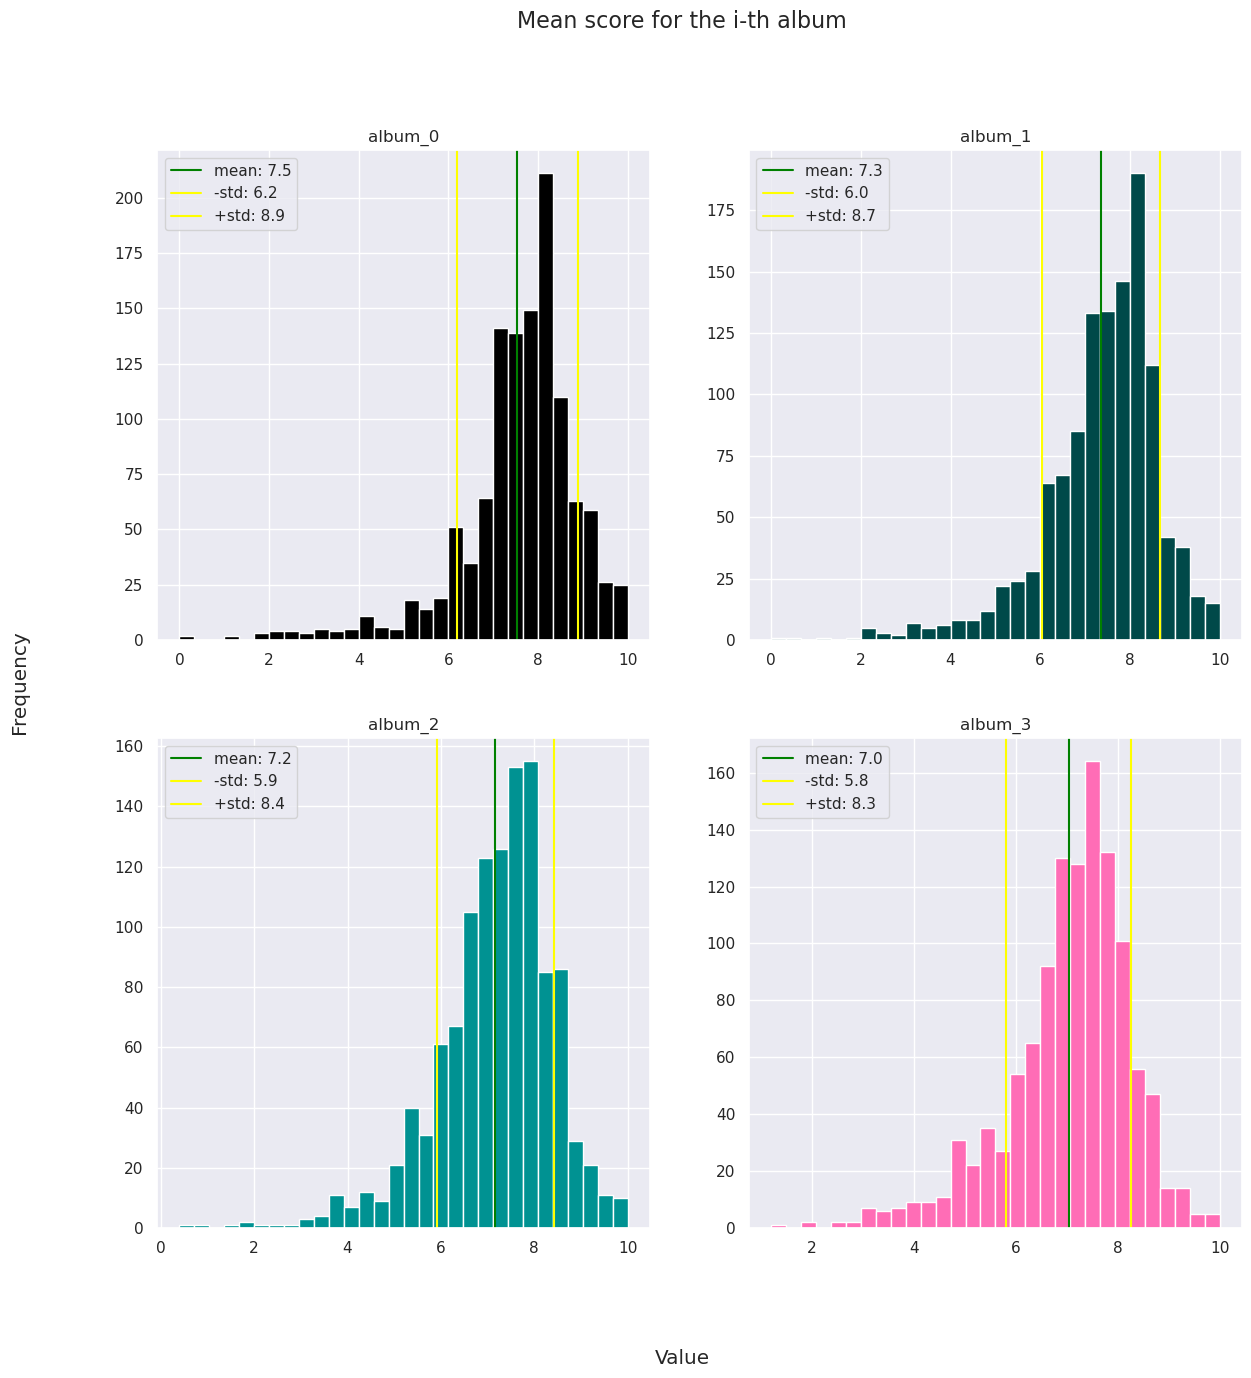

Test statistical difference between avg score for 2nd and 3rd albums: Ttest_indResult(statistic=3.4968440137106898, pvalue=0.0004795171154360254)
Test statistical difference between avg score for 3rd and 4ths albums: Ttest_indResult(statistic=2.401382200881532, pvalue=0.016410366357809986)


In [52]:
# filter artists with at least four albums
four_albums = album_count[album_count["album"] >= 4]
# Create the new dataframe with data for artists with at least four albums
newDf = df[df["artist"].isin(list(four_albums["artist"]))].copy()

# Order by artist and release year
newDf = newDf.sort_values(['artist', 'releaseyear']).reset_index()
newDf['previous_albums'] = 0

# Iterate over rows, when encounter an new album
for index, row in tqdm(newDf.iterrows()):
    if index > 0 and newDf.loc[index, 'artist'] == newDf.loc[index-1, 'artist']:
        newDf.loc[index, 'previous_albums'] = newDf.loc[index -
                                                        1, 'previous_albums'] + 1

# keep only the scores, and prev_album count for each album
newDf = newDf[['score', 'previous_albums']]

# add scores for all the i(th) albums to column album_i
scoresDf = pd.DataFrame()
for i in range(4):
    scoresDf[f'album_{i}'] = newDf[newDf['previous_albums']
                                   == i]['score'].reset_index(drop=True)

# plot means for i-th albums
single_image_subplots("Mean score for the i-th album", scoresDf,
                      [f'album_{i}' for i in range(4)], plot_cols=2, plot_std=True, plot_median=False)

# test statistical difference bw mean score of 2nd and 3rd albums
test = ttest_ind(scoresDf['album_1'].dropna(), scoresDf['album_2'].dropna())
print(
    f"Test statistical difference between avg score for 2nd and 3rd albums: {test}")

# test statistical difference bw mean scores of 3rd and 3th albums
test = ttest_ind(scoresDf['album_2'].dropna(), scoresDf['album_3'].dropna())
print(
    f"Test statistical difference between avg score for 3rd and 4ths albums: {test}")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ce287d7-97a5-4afa-9186-22928317a40f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>
